# Task 2 - Diabetes disease prediction

Sumbitted by : **SHIVJI**

### 1. Import required libraries

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### 2. Reading amd Understanding Data 

In [2]:
diabetes = pd.read_csv("./diabetes.csv")

# copying data to prevent data loss
df = diabetes.copy()

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
202,0,108,68,20,0,27.3,0.787,32,0
261,3,141,0,0,0,30.0,0.761,27,1


In [5]:
df.shape

(768, 9)

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


`Insight`

- This dataset have present the entries of the patients. These are **768 rows** and **9 columns**.
- **No missing values** present in dataset.
- Target variable is **Outcome**.


### 3. EDA

**Information Regarding Dataset Features**

- **Pregnancies** : can increase the chance that your baby will have birth defects, such as heart defects or defects of the brain or spine. [https://www.niddk.nih.gov/health-information/diabetes/diabetes-pregnancy#:~:text=A%20baby%27s%20organs%2C%20such%20as,of%20the%20brain%20or%20spine.]


- **Glucose** : Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes. [https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes#:~:text=Diabetes%20is%20a%20disease%20that,from%20the%20food%20you%20eat.]


- **BloodPressure** : Diabetes causes damage by scarring the kidneys, which in turn leads to salt and water retention, which in turn raises blood pressure. Ideal blood pressure is considered to be between 90/60mmHg and 120/80mmHg  [https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451#:~:text=A%20fasting%20blood%20sugar%20level,Glucose%20tolerance%20test.]


- **SkinThickness** : he range of skin + subcutaneous tissue thickness at arm is 2.25-17.85 mm in males and 4.90-21.00 mm in females. Skin thickness decreased as a result of diabetic progression. Skin thickness was significantly influenced by insulin level,  [https://www.researchgate.net/publication/343418223_Skin_Thickness_can_Predict_the_Progress_of_Diabetes_Type_2_A_New_Medical_Hypothesis#:~:text=Study%20findings%20showed%20that%20skin,level%2C%20but%20not%20glucose%20level.]


- **Insulin** : If you don't have enough insulin, glucose builds up in your bloodstream rather than getting into your cells to provide energy. With type 1 diabetes, the body does not make any insulin and therefore insulin has to be injected regularly every day to stay alive. [https://www.betterhealth.vic.gov.au/health/conditionsandtreatments/diabetes-and-insulin#:~:text=Insulin%20for%20diabetes,-Insulin%20is%20a&text=If%20you%20don%27t%20have,every%20day%20to%20stay%20alive.]


- **BMI** : The adjusted ORs showed that obese individuals (the highest BMI category) had 8.13 times higher risk of having diabetes compared with normal-weight individuals.  The higher your BMI, the higher your risk for certain diseases such as heart disease, high blood pressure, type 2 diabetes. If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range.  [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7886600/#:~:text=Association%20between%20diabetes%20and%20BMI.&text=The%20adjusted%20ORs%20showed%20that,compared%20with%20normal-weight%20individuals.]


- **DiabetesPedigreeFunction** : Diabetes pedigree function (DPF) calculates diabetes likelihood depending on the subject's age and his/her diabetic family history. [https://openventio.org/wp-content/uploads/Determinants-of-Gestational-Diabetes-Pedigree-Function-for-Pima-Indian-Females-IMOJ-6-121.pdf]


- **Age** :  Advanced age is a major risk factor for diabetes and prediabetes (after 50). [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9843502/#:~:text=According%20to%20a%20survey%2C%20the,%25%20and%2047.6%25%2C%20respectively.&text=Advanced%20age%20is%20a%20major%20risk%20factor%20for%20diabetes%20and%20prediabetes.]

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

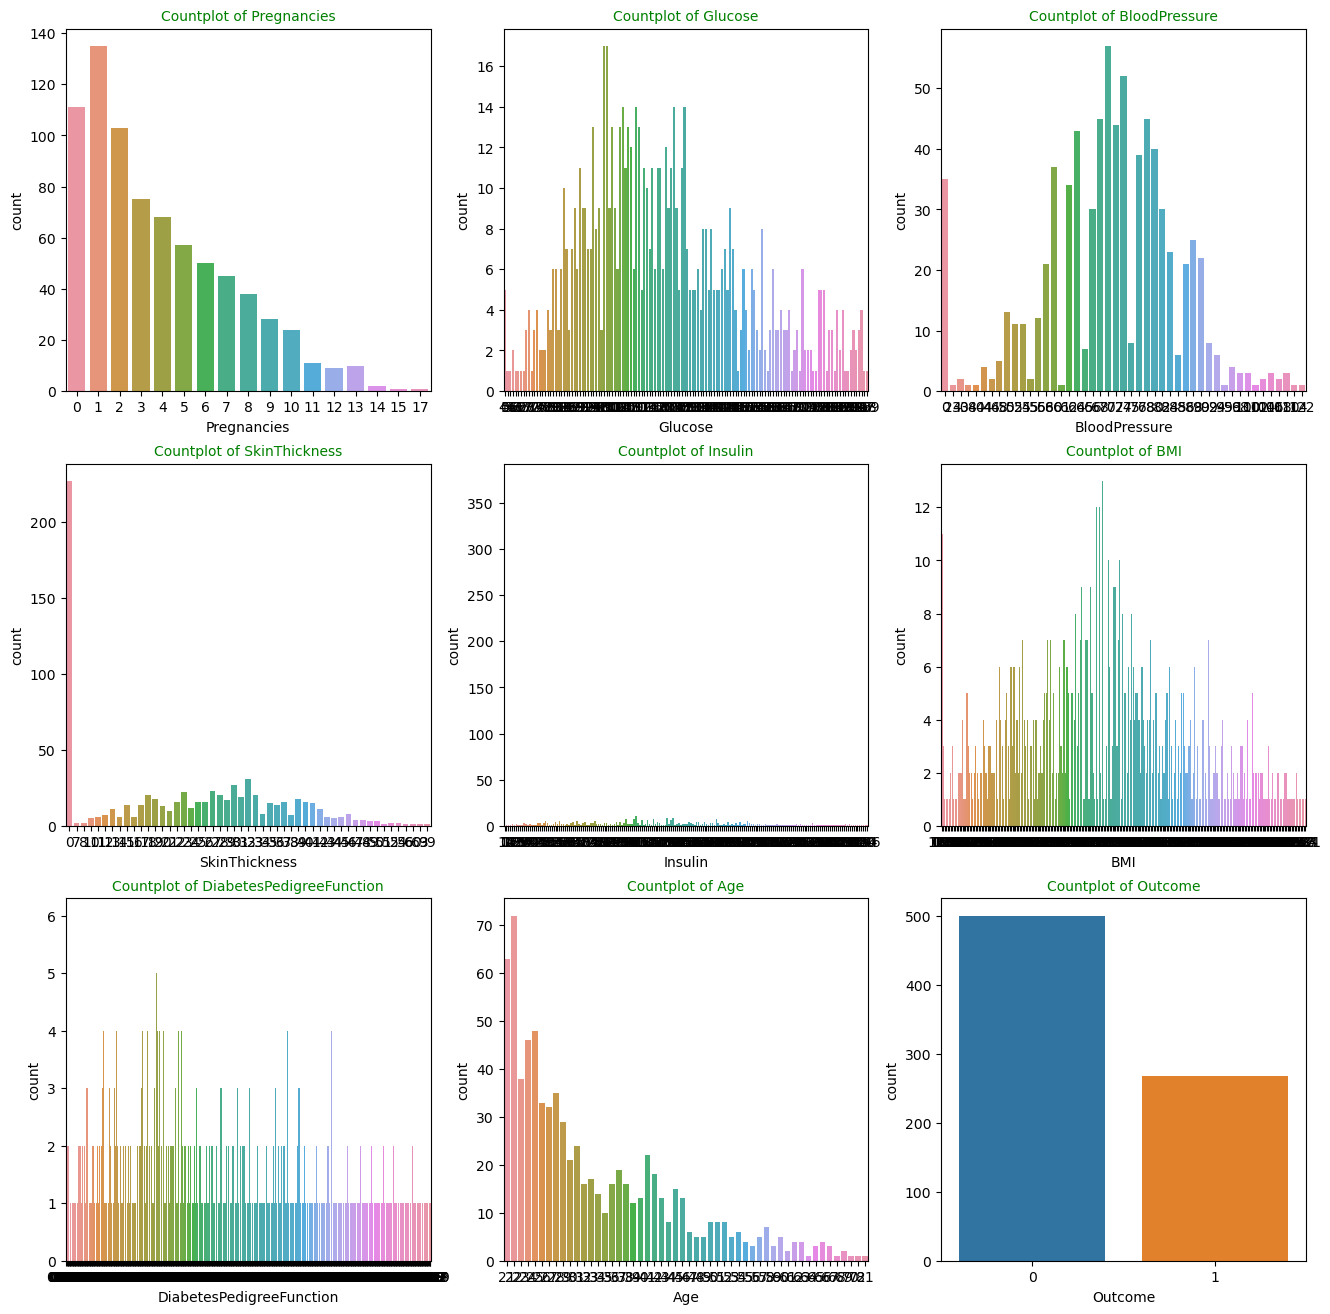

In [13]:
plt.figure(figsize=(16,16))
j = 1 
for i in df.columns:
    plt.subplot(3,3,j)
    plt.title(f"Countplot of {i}", size=10, color="green")
    sns.countplot(data = df, x=df[i])
    j+=1
plt.show()

##### 1. Pregnancies

In [14]:
df.Pregnancies.mean()

3.8450520833333335

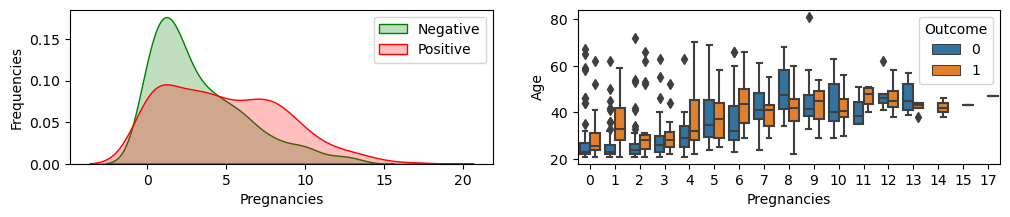

In [15]:
plt.figure(figsize=(12,2))
plt.subplot(1,2,1)
g = sns.kdeplot(df["Pregnancies"][df["Outcome"]==0], color="Green", fill=True)
g = sns.kdeplot(df["Pregnancies"][df["Outcome"]==1], color="Red", fill=True, ax=g)
g.legend(["Negative","Positive"])
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequencies")

plt.subplot(1,2,2)
g = sns.boxplot(data=df, x=df.Pregnancies,y="Age", hue="Outcome")
plt.show()

`Insight`

- From the displot, **There are less pregnant patients than non-pregnant patients.**
- From the Boxplot, **As the age increase (30-50) the chances of getting pregtnant also increase.**

##### 2.  Glucose

In [16]:
(df.Glucose.min(), df.Glucose.max())

(0, 199)

In [17]:
glu_0 = df["Glucose"][df["Outcome"]==0].shape[0]
glu_1 = df["Glucose"][df["Outcome"]==1].shape[0]

a = f"""The patients they have not diabetes {glu_0} 
The patient they have diabetes {glu_1}"""
print(a)

The patients they have not diabetes 500 
The patient they have diabetes 268


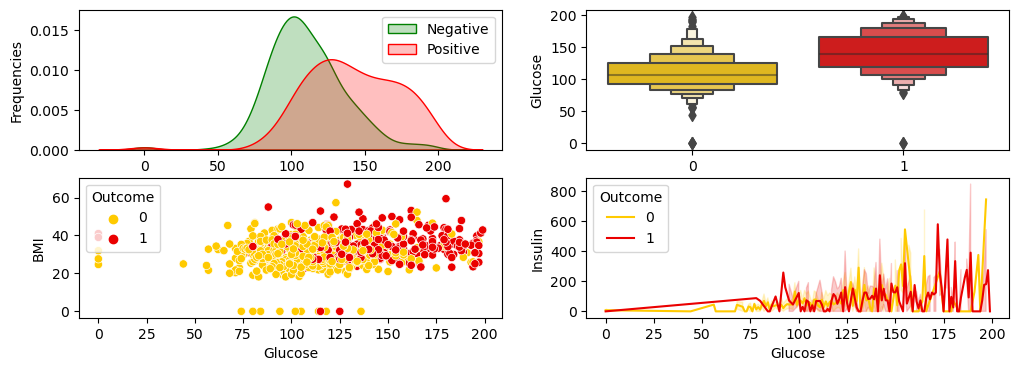

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(2,2, 1)
g = sns.kdeplot(df["Glucose"][df["Outcome"]==0], color="green", fill=True)
g = sns.kdeplot(df["Glucose"][df["Outcome"]==1], color="Red", fill=True, ax=g)
g.legend(["Negative","Positive"])
g.set_xlabel("Glucose")
g.set_ylabel("Frequencies")

plt.subplot(2,2,2)
sns.boxenplot(data=df, y="Glucose", x="Outcome", palette="hot_r")

plt.subplot(2,2,3)
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Outcome", palette="hot_r",)

plt.subplot(2,2,4)
sns.lineplot(data=df, x="Glucose", y="Insulin", hue="Outcome", palette="hot_r",)


plt.show()

`Insight`

- **There are glucose deficencies patients with diabetie is less than non-diabetes glucose patients.**
- **Dibeties patients have higher average value than Non-diabeties patients.** which is **150 higher than normal**. Normal glucose level is **100-125ml/DL**.
- **Most diabetes patients have high BMI values. It is due to increased in glucose level in patients.**. Which is not good for health.

##### 3.  Blood Pressure

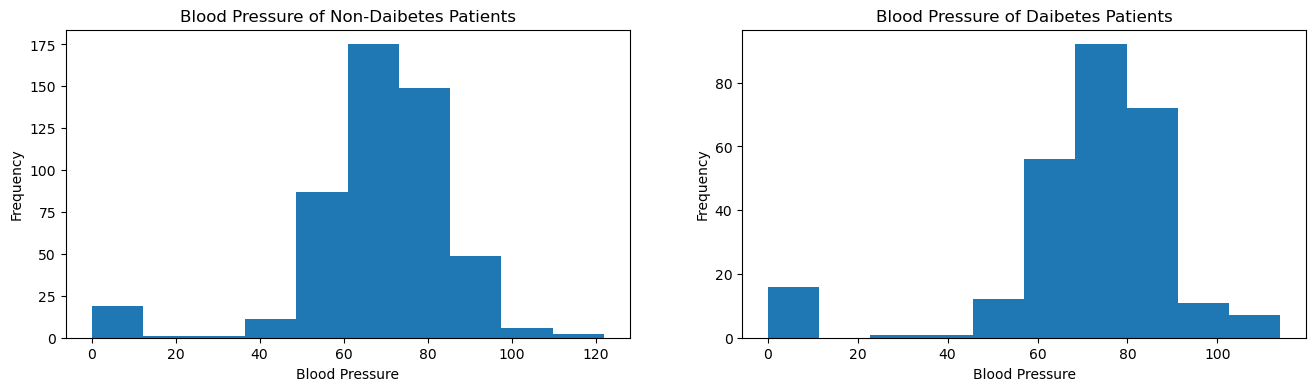

In [19]:
bp_0 = df["BloodPressure"][df["Outcome"]==0]
bp_1 = df["BloodPressure"][df["Outcome"]==1]

plt.figure(figsize=(16,4))
# blood pressure for non-diabeties
plt.subplot(1,2,1)
plt.title("Blood Pressure of Non-Daibetes Patients")
bp_0.plot(kind="hist")
plt.xlabel("Blood Pressure")

# blood pressure for diabeties
plt.subplot(1,2,2)
plt.title("Blood Pressure of Daibetes Patients")
bp_1.plot(kind="hist")
plt.xlabel("Blood Pressure")
plt.show()

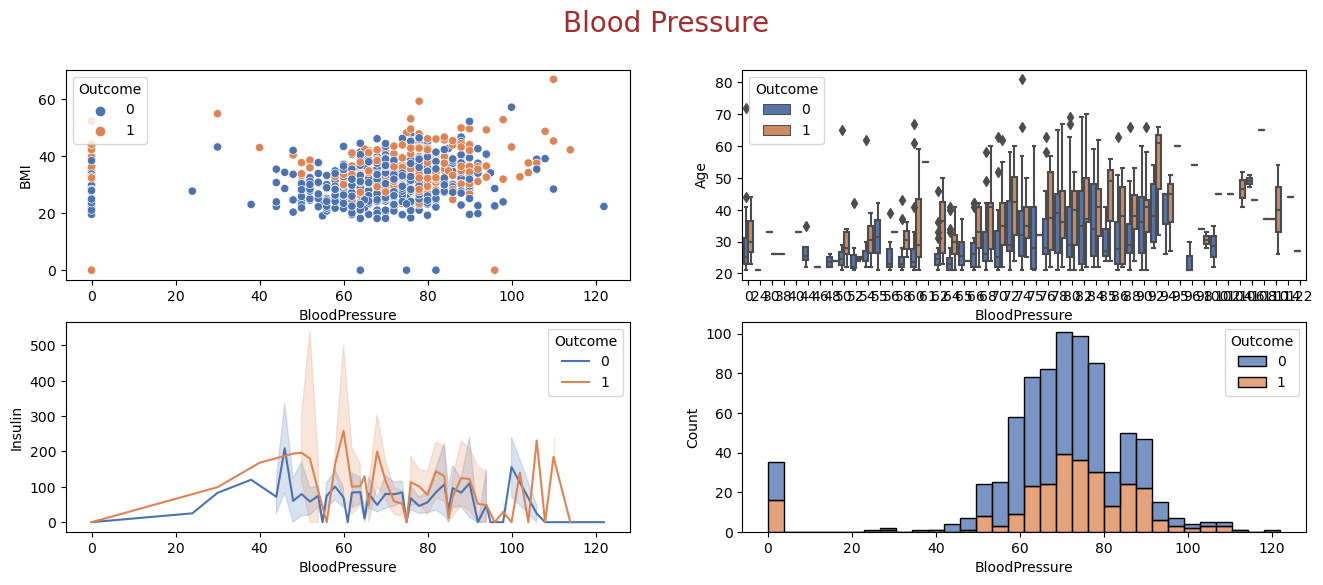

In [20]:
plt.figure(figsize=(16,6))
plt.suptitle("Blood Pressure", size=20, color="brown")
plt.subplot(2,2,1)
sns.scatterplot(data=df, x="BloodPressure", y="BMI", hue="Outcome", palette="deep")

plt.subplot(2,2,2)
sns.boxplot(data=df, x="BloodPressure", y="Age", hue="Outcome", palette="deep")

plt.subplot(2,2,3)
sns.lineplot(data=df, x="BloodPressure", y="Insulin", hue="Outcome", palette="deep")

plt.subplot(2,2,4)
sns.histplot(data=df, x="BloodPressure", hue="Outcome", palette="deep", multiple="stack")
#'layer', 'stack', 'fill', 'dodge'
plt.show()

`Insight`
- Scatterplot shows that **BloodPressure decrease those diabetes patients who have high BMI values.** It shows the sign of unfit patients.
- From the boxplot, **Higher age patients have low BloodPressure**.
- Lineplot shows that **During low blood pressure diabeties patients need more insulin**.
- Distribution of Blood Pressure shows that **most patients have low blood pressure problem**. which is **50-90**.

##### 4.  Skinthickness

In [21]:
np.quantile(df.SkinThickness, q=0.25), np.quantile(df.SkinThickness, q=0.5), np.quantile(df.SkinThickness, q=0.75), np.quantile(df.SkinThickness, q=0.1)

(0.0, 23.0, 32.0, 0.0)

In [22]:
df.SkinThickness.skew()

0.10937249648187608

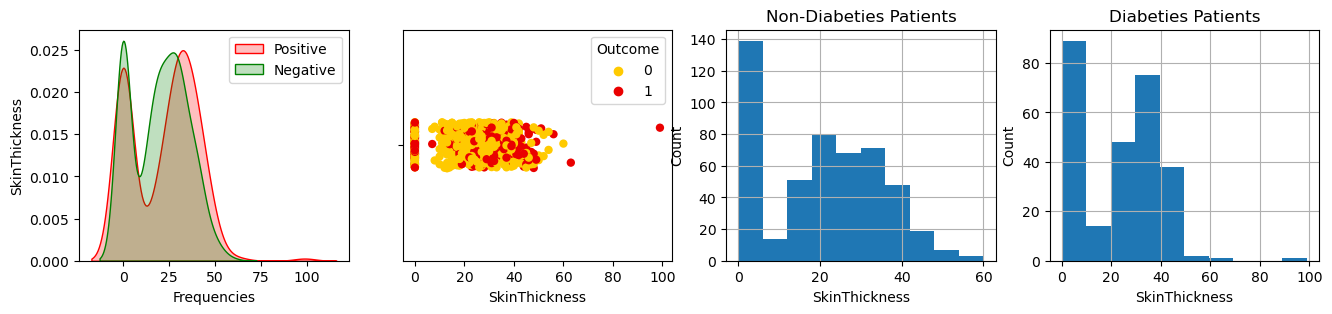

In [23]:
plt.figure(figsize=(16,3))
plt.subplot(1,4,1)
g= sns.kdeplot(df["SkinThickness"][df["Outcome"]==1], color="red", fill=True)
g= sns.kdeplot(df["SkinThickness"][df["Outcome"]==0], color="Green", fill=True, ax=g)
plt.legend(["Positive","Negative"])
plt.ylabel("SkinThickness")
plt.xlabel("Frequencies")

plt.subplot(1,4,2)
sns.stripplot(data=df, x=df.SkinThickness, hue="Outcome", palette="hot_r",orient=30, size=6)

plt.subplot(1,4,3)
plt.title("Non-Diabeties Patients")
df.SkinThickness[df.Outcome==0].hist()
plt.ylabel("Count")
plt.xlabel("SkinThickness")

plt.subplot(1,4,4)
plt.title("Diabeties Patients")
df.SkinThickness[df.Outcome==1].hist()
plt.ylabel("Count")
plt.xlabel("SkinThickness")

plt.show()


`Insight`

- **Skin thickness seems be be skewed a bit.**. 
- From Histogram, **For Non-Daibeties patient data seem to like normal distribution** 

##### 5.  Insulin

In [24]:
df.Insulin.describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

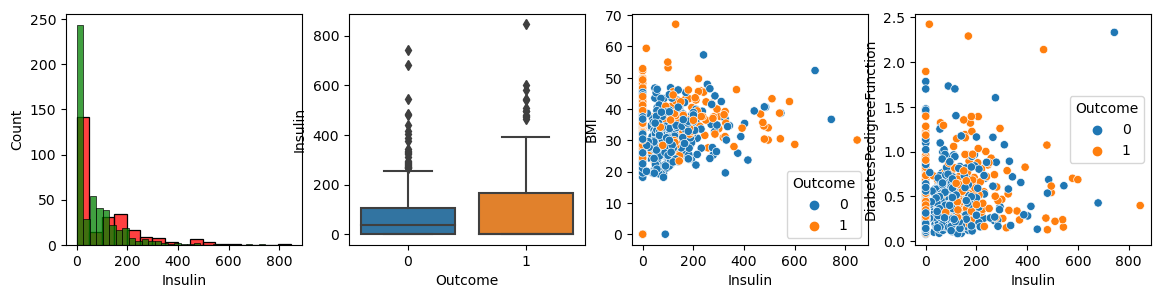

In [25]:
plt.figure(figsize=(14,3))

plt.subplot(1,4,1)
sns.histplot(df["Insulin"][df.Outcome==1], kde=False, color="red")
sns.histplot(df["Insulin"][df.Outcome==0], kde=False, color="green")

plt.subplot(1,4,2)
sns.boxplot(data=df, x=df["Outcome"], y="Insulin")

plt.subplot(1,4,3)
sns.scatterplot(data=df, x="Insulin", y="BMI",hue="Outcome")

plt.subplot(1,4,4)
sns.scatterplot(data=df, x="Insulin", y="DiabetesPedigreeFunction",hue="Outcome")

plt.show()

`Insight`

- **For Non Diabeties patients have low insuline value than diabeties patients.**. It seems that outliers values are present.
- **Insuline require for higher BMI value patients**.

##### 6. BMI 

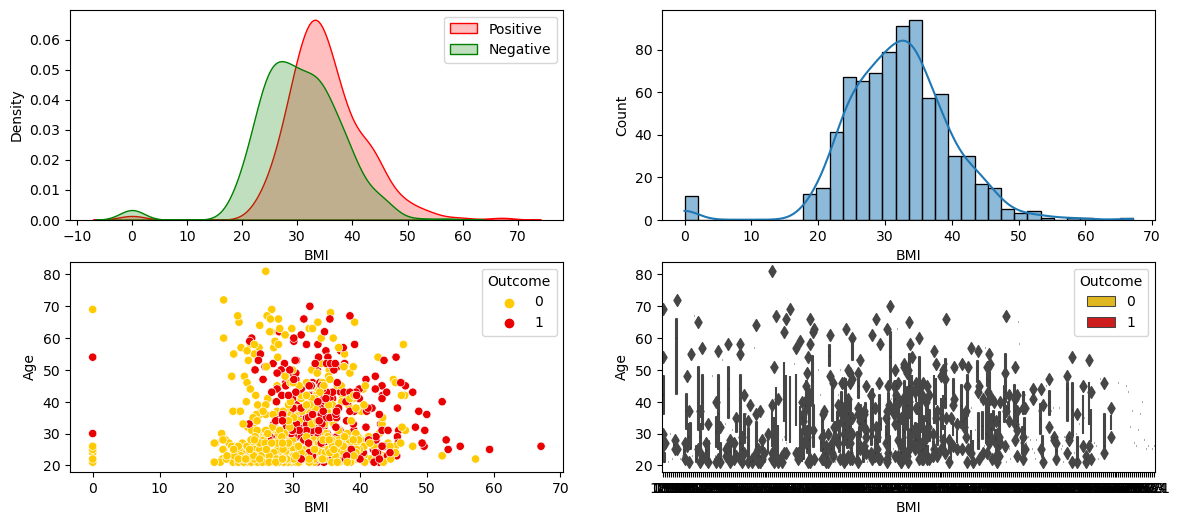

In [26]:
plt.figure(figsize=(14,6))

plt.subplot(2,2,1)
sns.kdeplot(df["BMI"][df.Outcome==1],fill=True, color="red")
sns.kdeplot(df["BMI"][df.Outcome==0],fill=True, color="green")
plt.legend(["Positive", "Negative"])


plt.subplot(2,2,2)
sns.histplot(df.BMI, kde=True)

plt.subplot(2,2,3)
sns.scatterplot(data=df, x="BMI", y="Age", hue="Outcome", palette="hot_r")

plt.subplot(2,2,4)
sns.boxenplot(data=df, x="BMI", y="Age", hue="Outcome", palette="hot_r")


plt.show()

`Insight`

- **Diabeties patient have high bmi values.**
- **Dataset patients bmi fall in range of 20-50. Apart from 25bmi they consider as unfit**.
- **Age play a major roll in high bmi values.**
- **Most of the patient have high bmi after 36age**.

##### 7.  DiabetesPedigreeFunction

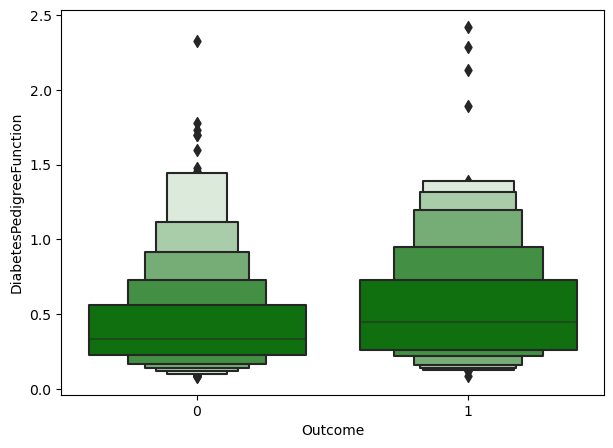

In [29]:
plt.figure(figsize=(7,5))
sns.boxenplot(data=df, x="Outcome", y="DiabetesPedigreeFunction", color="green", scale="area")
plt.show()

`Insight`

- **Diabeties pedigree function is directly related to diabeties.**
- **If the value of diabetiespedigree function increase chances of getting diabetics patiest has increased**. 

##### 8. Age

In [46]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

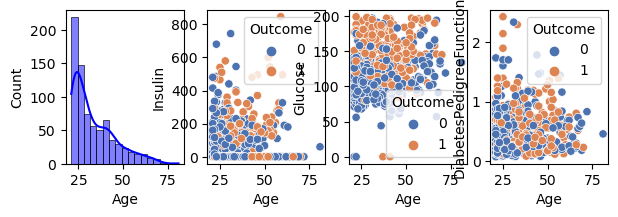

In [47]:
plt.figure(figsize=(7,2))

plt.subplot(1,4,1)
sns.histplot(df.Age, kde=True, color="b")

plt.subplot(1,4,2)
sns.scatterplot(x=df.Age, y = df.Insulin, hue="Outcome", data=df, palette="deep")

plt.subplot(1,4,3)
sns.scatterplot(x=df.Age, y = df.Glucose, hue="Outcome", data=df, palette="deep")

plt.subplot(1,4,4)
sns.scatterplot(x=df.Age, y = df.DiabetesPedigreeFunction, hue="Outcome", data=df, palette="deep")


plt.show()

`Insight`

- **Most patient have from 25 to 60 age.**
- **Insulin requrie after 30+ age**
- **DiabetiesPedigreefunction more on age from 40-60**
- **Glucose requrie when the diabeties patients age increase**.

##### 9. Outcome

In [42]:
df.Outcome.value_counts()[1]

268

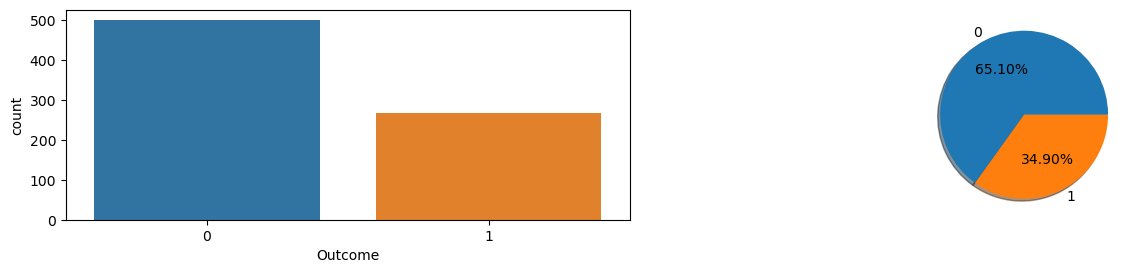

In [32]:
plt.figure(figsize=(16,6))

plt.subplot(2,2,1)
sns.countplot(data = df, x=df.Outcome)

plt.subplot(2,2,2)
palette_color = sns.color_palette('BuGn')
df.Outcome.value_counts().plot.pie(autopct="%0.2f%%", shadow=True)
plt.ylabel("")

plt.show()

`Insight`

- **Dataset have low diabeties patients than non-diabeties patients** Which is approx **35%** of the dataset (268/768) entries.

#### Multivariate Analysis

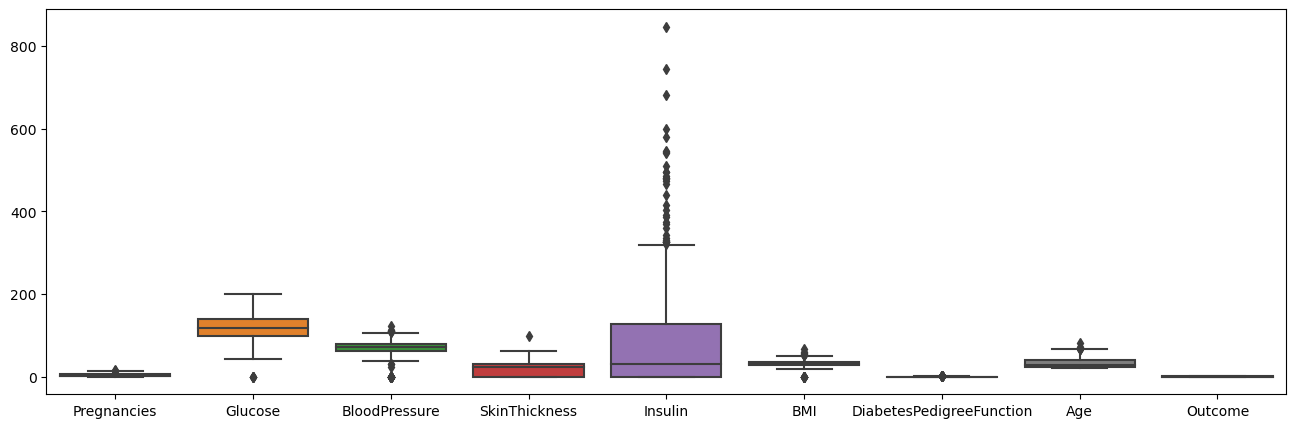

In [49]:
plt.figure(figsize=(16,5))
sns.boxplot(df)
plt.show()

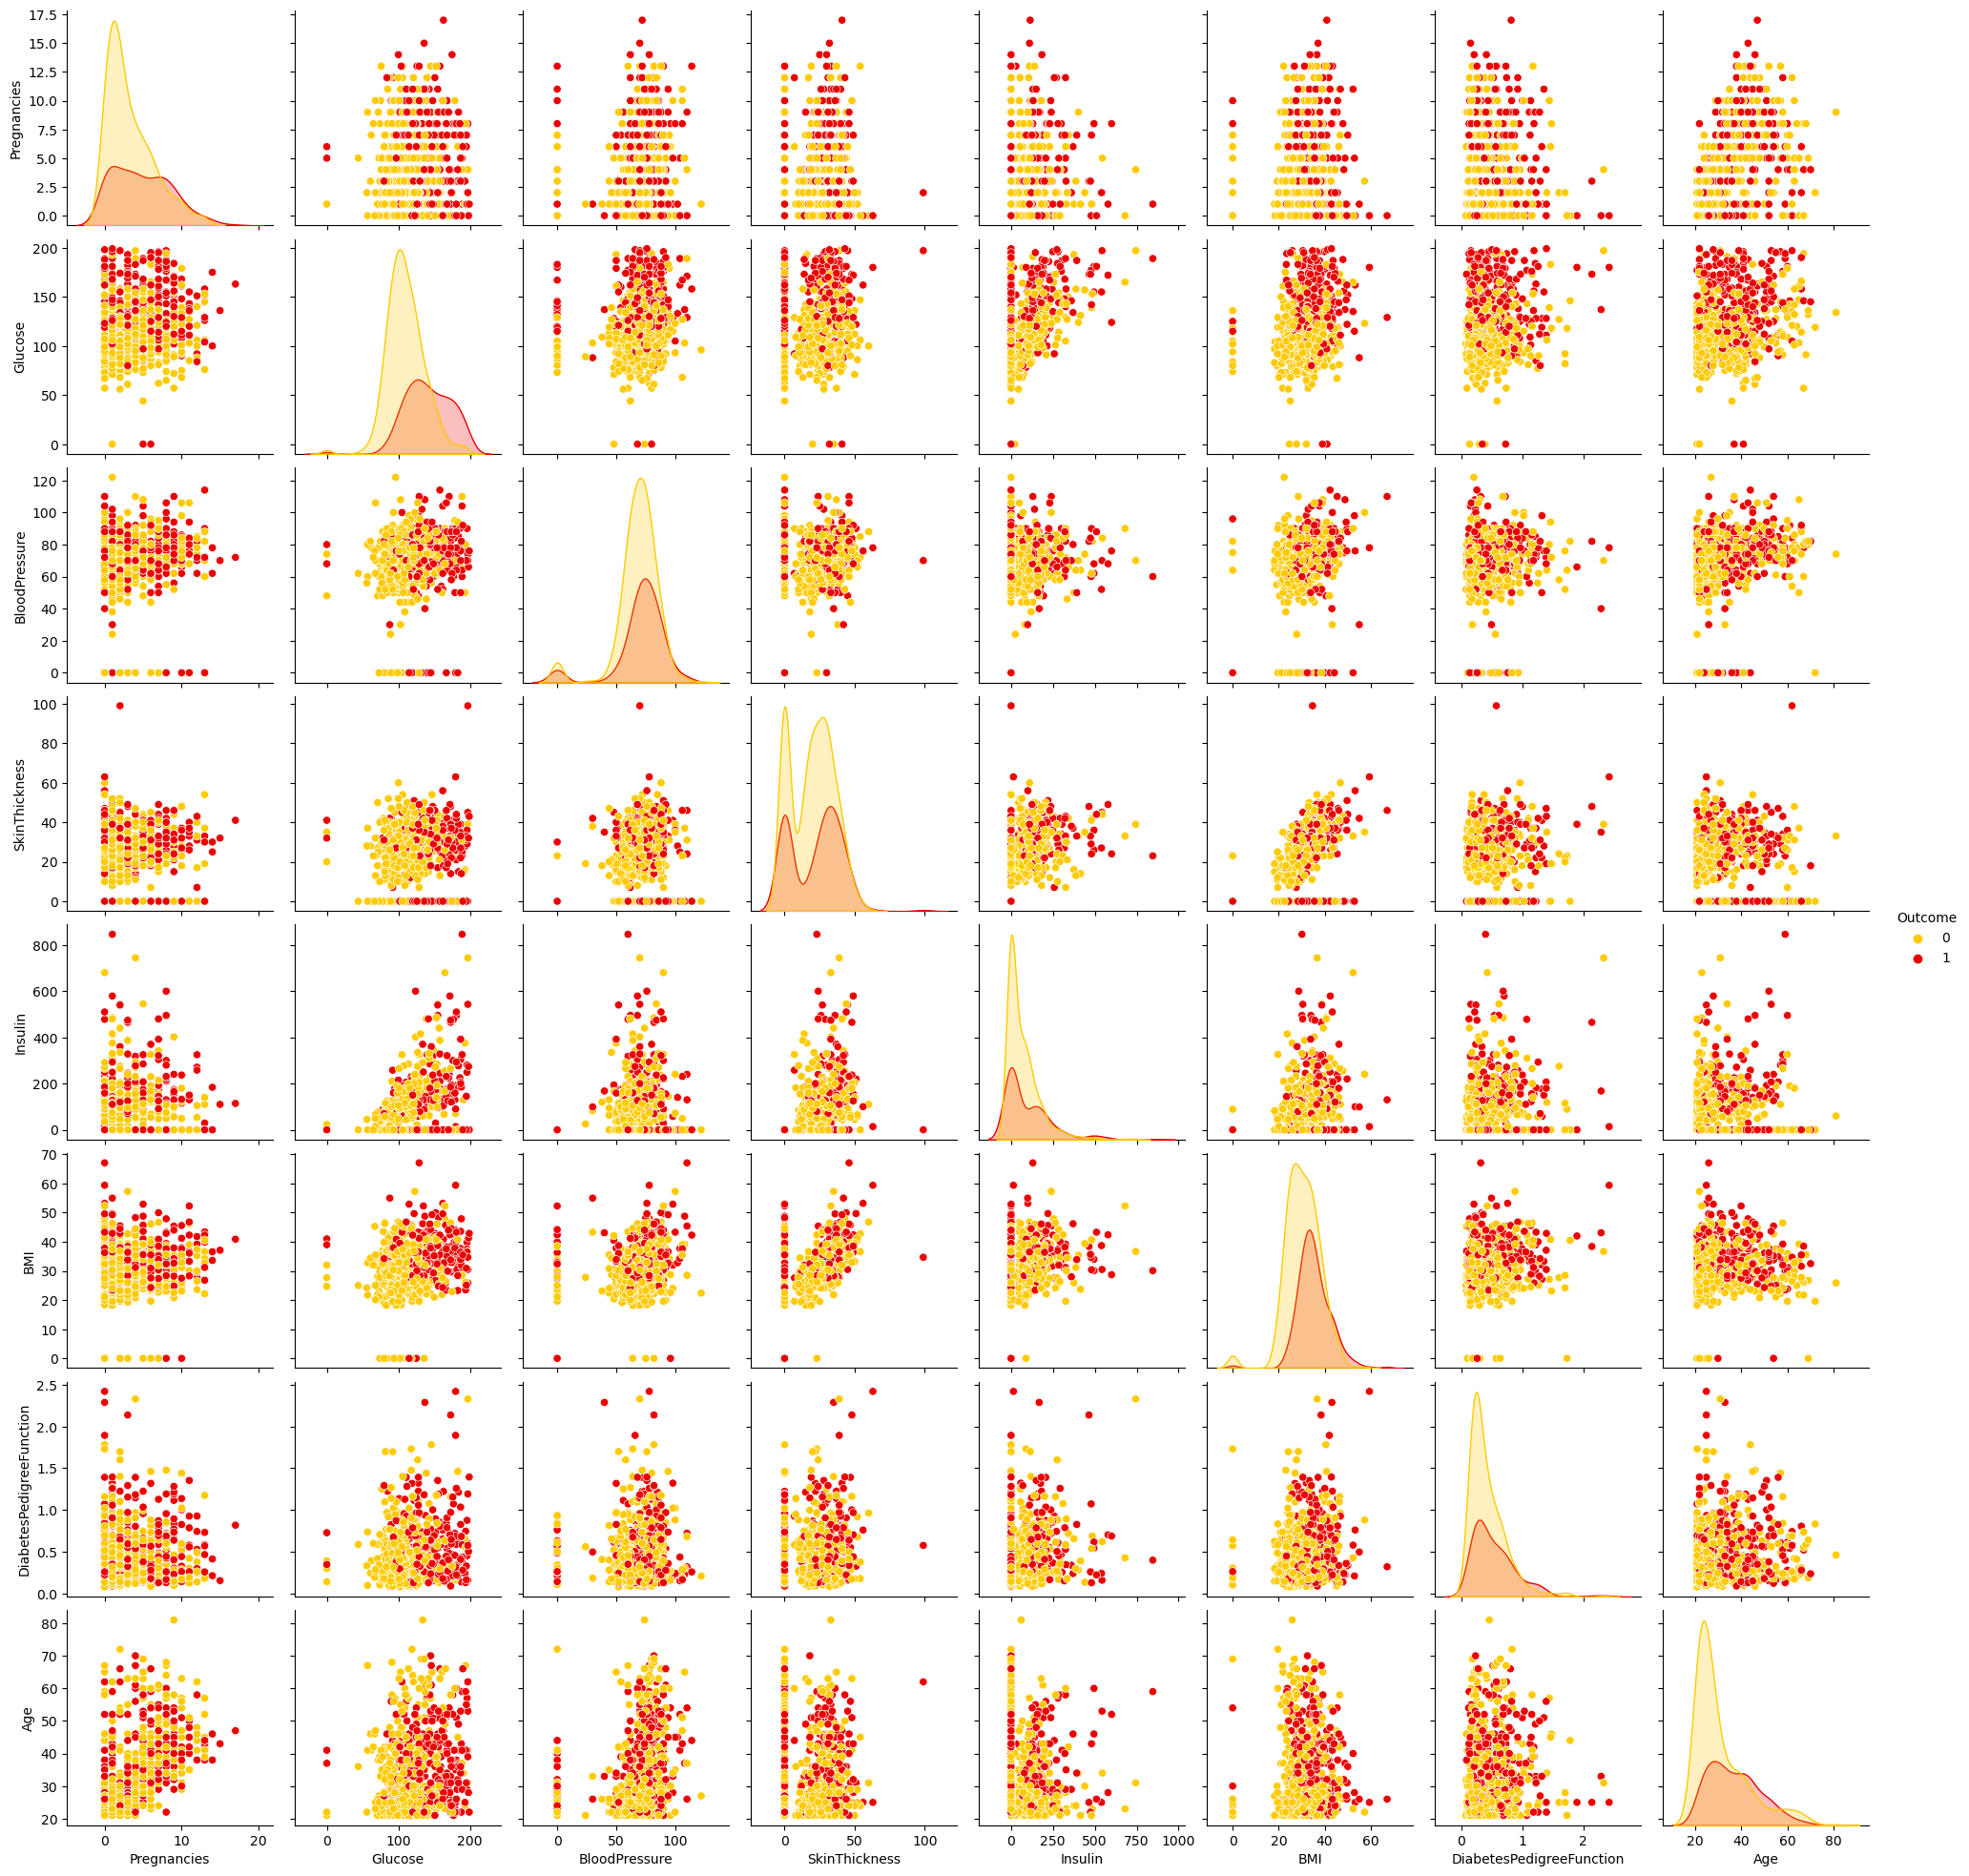

In [50]:
sns.pairplot(data=df, hue="Outcome", palette="hot_r")
plt.show()

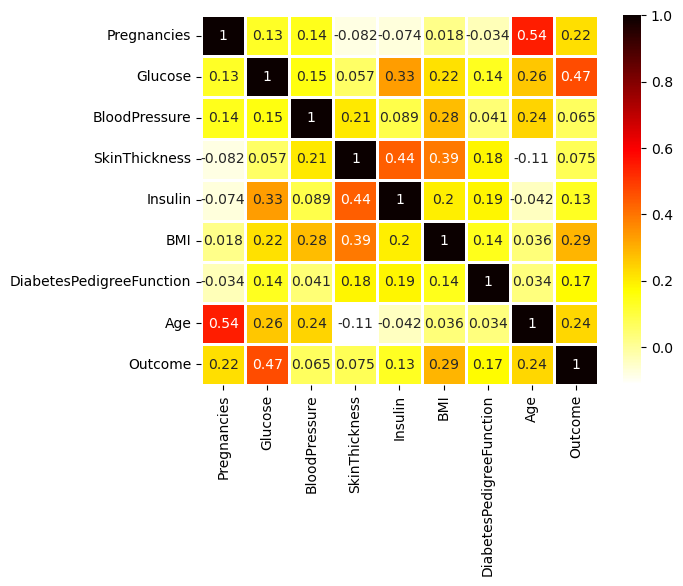

In [51]:
sns.heatmap(df.corr(), annot=True, lw=1,cmap="hot_r")
plt.show()

### 4. Data Preprocessing

- **Handling Missing Values**

In [54]:
# checking missing values
df.isna().sum()/len(df)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

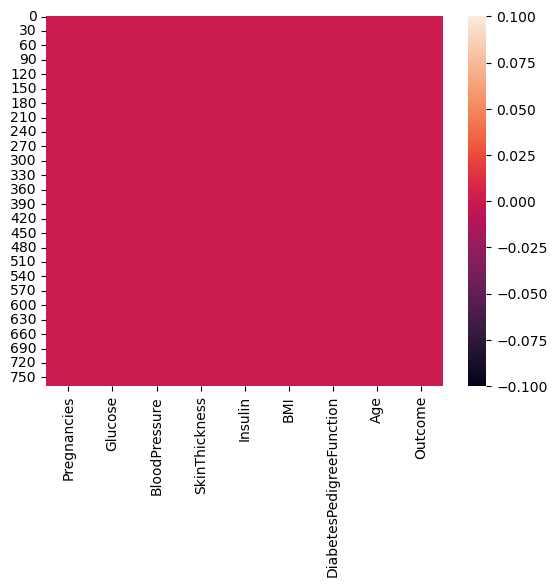

In [55]:
# visualizing missing values
sns.heatmap(df.isna())
plt.show()

**Insight**

- There are **no missing values** present in dataset.
- There are some columns where **0 is present, It is not bymistake. It put to fill the empty space**. For maintaing data.
- In this dataset have **0 value present in Outcome column. It is our target variable. We can't change it**.

In [56]:
df2= df

df2[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = df2[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0, np.nan)

In [57]:
df2.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
669,9,154.0,78.0,30.0,100.0,30.9,0.164,45,0
423,2,115.0,64.0,22.0,NaN,30.8,0.421,21,0


In [58]:
df2.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [59]:
# replacing NaN with mean values
df2["Glucose"] = df2["Glucose"].fillna(df2["Glucose"].mean())
df2["BloodPressure"] = df2["BloodPressure"].fillna(df2["BloodPressure"].mean())
df2["SkinThickness"] = df2["SkinThickness"].fillna(df2["SkinThickness"].mean())
df2["Insulin"] = df2["Insulin"].fillna(df2["Insulin"].mean())
df2["BMI"] = df2["BMI"].fillna(df2["BMI"].mean())

In [60]:
df2 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [61]:
df2.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- #### Outlier Detection

In [62]:
from collections import Counter

In [63]:
def detect_outliers(df,n,features):
    outlier_indices = []
    """
    Detect outliers from given list of features. It returns a list of the indices
    according to the observations containing more than n outliers according
    to the Tukey method
    """
    # iterate over features(columns)
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from numeric features
outliers_to_drop = detect_outliers(df2, 2 ,["Pregnancies", 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'Insulin', 'Age'])


In [64]:
df2.iloc[outliers_to_drop]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
662,8,167.0,106.0,46.0,231.0,37.6,0.165,43,1
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
39,4,111.0,72.0,47.0,207.0,37.1,1.390,56,1
370,3,173.0,82.0,48.0,465.0,38.4,2.137,25,1


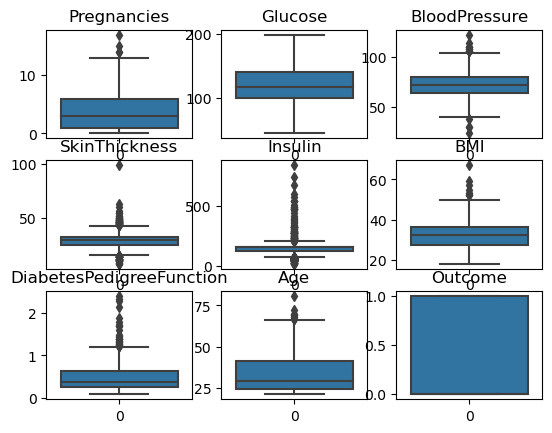

In [65]:
# j = 1
# for i in df.columns:
#     plt.subplot(3,3,j)
#     plt.title(f"{i}")
#     sns.boxplot(df2[i])
#     j+=1

`Insight`

- **Mising value are handled**
- **Outlier values are also handled.**

### 5. Model Building

- #### Data Modeling

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = df2.drop(["Outcome"], axis=1)
y = df2["Outcome"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [70]:
X_train.shape, y_train.shape

((537, 8), (537,))

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [72]:
def model(model,X_train, X_test, y_train, y_test):
    # create instance of model and fit the model
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    print(f"""Model : {model} \nModel Accuracy : {accuracy}""")

##### Model 1: RandomForestModel

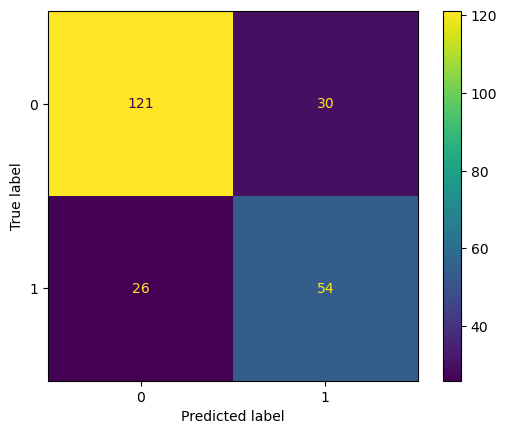

Model : RandomForestClassifier(max_depth=120, random_state=98) 
Model Accuracy : 0.7575757575757576


In [73]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=120, random_state=98)
model(rfc, X_train,X_test,y_train, y_test)

##### Model 2: AdaboostClassifier

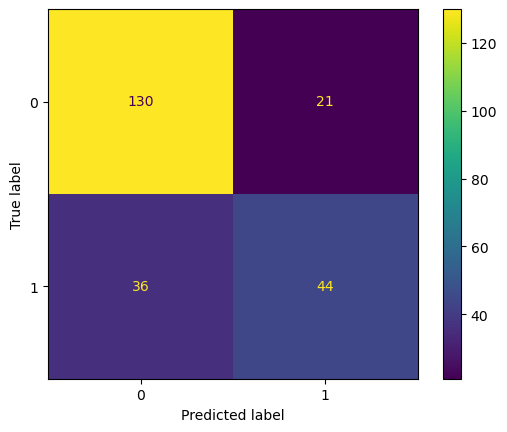

Model : AdaBoostClassifier(learning_rate=0.1, random_state=52) 
Model Accuracy : 0.7532467532467533


In [74]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=.10, random_state=52)
model(abc, X_train,X_test,y_train, y_test)

##### Model 3: BaggingClassifier

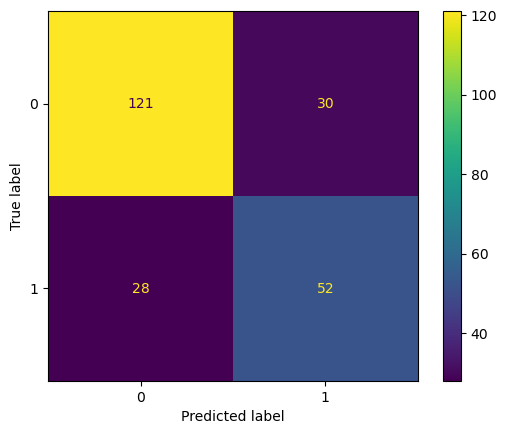

Model : BaggingClassifier(random_state=29) 
Model Accuracy : 0.7489177489177489


In [75]:
bc = BaggingClassifier(random_state=29)
model(bc, X_train,X_test,y_train, y_test)

##### Model 4: GradientBoostingClassifier

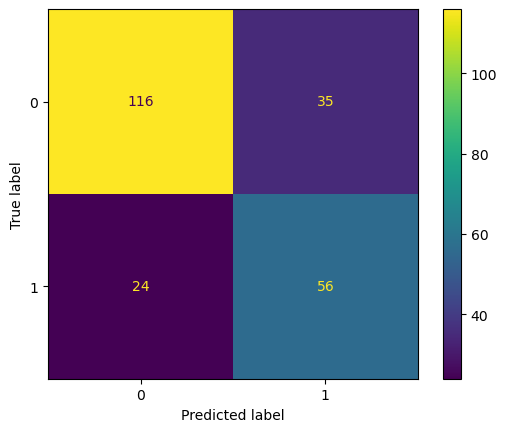

Model : GradientBoostingClassifier(random_state=42) 
Model Accuracy : 0.7445887445887446


In [76]:
gbc = GradientBoostingClassifier(random_state=42)
model(gbc, X_train,X_test,y_train, y_test)

##### Model 5: DecisionTreeClassifier

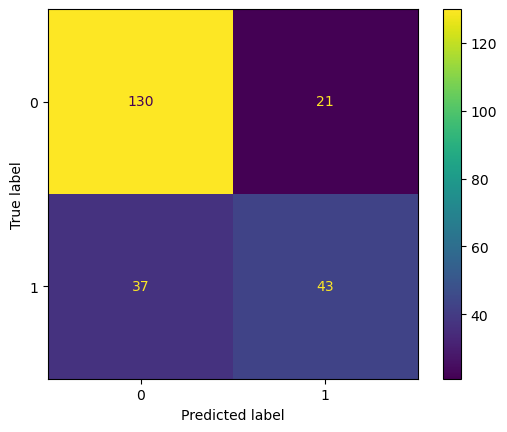

Model : DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=20,
                       random_state=42) 
Model Accuracy : 0.7489177489177489


In [77]:
dtc = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=20,min_samples_leaf=2)
model(dtc, X_train,X_test,y_train, y_test)

##### Model 6: VotingClassifer

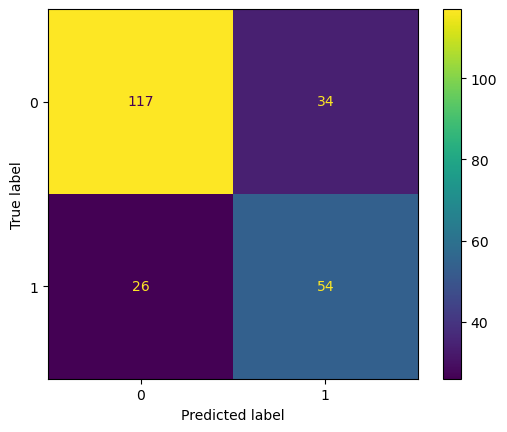

Model : VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(n_estimators=250)),
                             ('BaggingClassifier',
                              BaggingClassifier(n_estimators=250)),
                             ('Adaboost',
                              AdaBoostClassifier(learning_rate=0.03,
                                                 random_state=42)),
                             ('GradientBoosting',
                              GradientBoostingClassifier(random_state=42)),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier(max_depth=6,
                                                     random_state=42))],
                 weights=[2, 1, 1, 3, 2]) 
Model Accuracy : 0.7402597402597403


In [78]:
rfc2 = RandomForestClassifier(n_estimators=250)
bc2 = BaggingClassifier(n_estimators=250)
abc2 = AdaBoostClassifier(learning_rate=.03, random_state=42,)
gbc2 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,random_state=42)
dtc2 = DecisionTreeClassifier(max_depth=6,random_state=42)

#############################
vc = VotingClassifier(estimators= [ ("RandomForest",rfc2),
                                    ("BaggingClassifier", bc2),
                                   ("Adaboost", abc2),
                                   ("GradientBoosting", gbc2),
                                   ("DecisionTreeClassifier", dtc2)                                  
                                  ], weights= [2,1,1,3,2],voting="hard")
model(vc, X_train,X_test,y_train, y_test)

- #### Save the model

In [79]:
import pickle

In [80]:
# save the best model for furthur use
pickle.dump(rfc, open("rfc_model.pkl", "wb+"))

In [81]:
random_forest = pickle.load(open("rfc_model.pkl", "rb"))

In [82]:
random_forest

RandomForestClassifier(max_depth=120, random_state=98)

- ####  Making Prediction

In [83]:
# Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome
# 2	108	52	26	63	32.5	0.318	22	0
# 9	171	110	24	240	45.4	0.721	54	1

pregnancies = 3
glucose = 150
bp = 50
skin_thickness = 25
insulin =190
bmi = 46.0
dpedigree_fun = 0.25
age = 49

df_pr = pd.DataFrame({"Pregnancies": pregnancies,
                      "Glucose":glucose,
                      "BloodPressure":bp,
                      "SkinThickness":skin_thickness,
                      "Insulin":insulin,
                      "BMI":bmi,
                      "DPedigreeFunction":dpedigree_fun,
                      "Age":age}, index=[0])
df_pr
pred = random_forest.predict([[pregnancies, glucose, bp,skin_thickness,insulin,bmi, dpedigree_fun, age]])
print(["Diabeties" if pred==1 else "Not Diabeties"])

['Diabeties']


### 6. Conclusion

In conclusion, diabetes prediction plays a critical role in proactive healthcare and disease management. The use of advanced data analysis and machine learning models has opened new possibilities for identifying individuals at risk of diabetes. These predictive models analyze a wide range of factors, including genetic, lifestyle, and clinical data, to provide early warnings and personalized recommendations for prevention and intervention.

The potential benefits of diabetes prediction are immense. Early detection can lead to timely lifestyle changes, medical interventions, and improved quality of life for individuals at risk. Additionally, healthcare providers can allocate resources more efficiently, focusing on those who need the most attention.

However, it's important to remember that no prediction model is perfect, and results should be interpreted cautiously. Diabetes prediction is just one part of the broader effort to combat this prevalent disease. Regular medical check-ups, a healthy lifestyle, and ongoing patient education remain crucial components of diabetes prevention and management.

As technology continues to advance, the field of diabetes prediction will only become more accurate and accessible, offering the promise of healthier lives and reduced healthcare costs.